Max safe pitch as a function of vertical FOV

$$ \psi_{\text{max}} = \frac{FOV_{vertical}}{2} $$

Due to the dynamics of a quadrotor (refer to Mellinger), a maximum allowable pitch is directly mapped to a maximum allowable deceleration:

$$ a_{max} = g \tan \bigg( \frac{FOV_{vetical}}{2} \bigg)$$

A maximum allowable deceleration defines the maximum stopping distance, for a given speed.  In order to keep the maximum stopping distance inside of the maximum depth range, then the allowable speed must be limited.  With a simple double-integrator approximation of the quadrotor dynamics, solving $p(t) = \frac{1}{2}at2 + v_0t$ and $v(t) = at + v_0$ for $t = \frac{-v_0}{a}$ gives the following:

$$ v_0 = \sqrt{\frac{2pa}{3}}$$

Note that we've ommitted the negative sign which just represents that $a$ is opposite to the vector $p$.

This gives the maximum allowable speed directly as a function of the depth camera used.  $p$ is the stopping distance, which to maintain safe flight must be less than the maximum depth sensor range.  

We now have a function that relates the two of the key characteristics of a depth camera, the vertical FOV and the range, to the maximum allowable speed in forward flight:

$$ v_{max} = \sqrt{ \frac{2 d_{max} g}{3}\tan\bigg( \frac{FOV_{vertical}}{2} \bigg)} $$

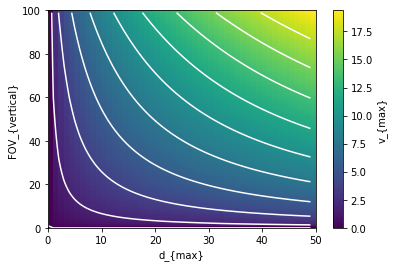

In [32]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

def f(dmax,fov_vertical):
    fov_vertical = fov_vertical * np.pi/180.0
    return np.sqrt(2*dmax*9.8/3*np.tan(fov_vertical/2))

# dmax
xmin = 0
xmax = 50

# fov_vertical
ymin = 0
ymax = 100

z = numpy.array([[f(x, y) for x in range(xmin,xmax)] for y in range(ymin,ymax)])

plt.pcolormesh(z)
plt.colorbar(label='v_{max}')
curves = 10
m = max([max(row) for row in z])
levels = numpy.arange(0, m, (1 / float(curves)) * m)
plt.contour(z, colors="white", levels=levels)
plt.xlabel('d_{max}')
plt.ylabel('FOV_{vertical}')
plt.show()

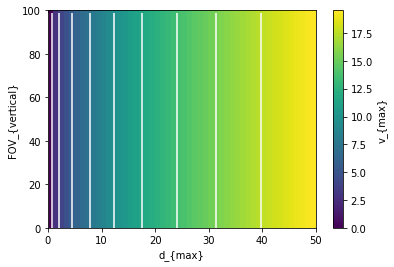

In [35]:
def f2(dmax,fov_vertical):
    fov_vertical = 100 * np.pi/180.0
    return np.sqrt(2*dmax*9.8/3*np.tan(fov_vertical/2))

# dmax
xmin = 0
xmax = 50

# fov_vertical
ymin = 0
ymax = 100

z = numpy.array([[f2(x, y) for x in range(xmin,xmax)] for y in range(ymin,ymax)])

plt.pcolormesh(z)
plt.colorbar(label='v_{max}')
curves = 10
m = max([max(row) for row in z])
levels = numpy.arange(0, m, (1 / float(curves)) * m)
plt.contour(z, colors="white", levels=levels)
plt.xlabel('d_{max}')
plt.ylabel('FOV_{vertical}')
plt.show()

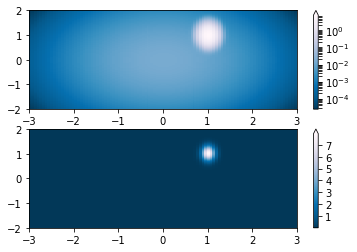

In [2]:
"""
Demonstration of using norm to map colormaps onto data in non-linear ways.
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

'''
Lognorm: Instead of pcolor log10(Z1) you can have colorbars that have
the exponential labels using a norm.
'''
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
Z1 = bivariate_normal(X, Y, 0.1, 0.2, 1.0, 1.0) +  \
    0.1 * bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z1,
                   norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max()),
                   cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolor(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')
fig.show()

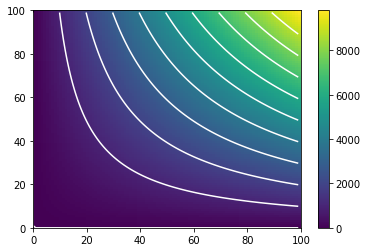

In [5]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

def f(x, y):
  return x*y

xmax = ymax = 100
z = numpy.array([[f(x, y) for x in range(xmax)] for y in range(ymax)])

plt.pcolormesh(z)
plt.colorbar()
curves = 10
m = max([max(row) for row in z])
levels = numpy.arange(0, m, (1 / float(curves)) * m)
plt.contour(z, colors="white", levels=levels)
plt.show()